<a href="https://colab.research.google.com/github/cris-her/AI/blob/master/logistic_regression_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Contra sesgo y varianza: técnicas de feature selection y feature extraction (PCA), regularizacion y balanceo (oversampling y undersampling).

Kernels comunes: lineales, polinomiales y gaussianos (RGF).

In [1]:
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import KernelPCA

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
dt_heart = pd.read_csv('https://raw.githubusercontent.com/cris-her/AI/master/heart.csv')
print(dt_heart.head(5))

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   52    1   0       125   212    0  ...      0      1.0      2   2     3       0
1   53    1   0       140   203    1  ...      1      3.1      0   0     3       0
2   70    1   0       145   174    0  ...      1      2.6      0   0     3       0
3   61    1   0       148   203    0  ...      0      0.0      2   1     3       0
4   62    0   0       138   294    1  ...      0      1.9      1   3     2       0

[5 rows x 14 columns]


In [3]:
dt_features  = dt_heart.drop(['target'], axis=1)
dt_target = dt_heart['target']

dt_features = StandardScaler().fit_transform(dt_features)

X_train, X_test, y_train, y_test = train_test_split(dt_features, dt_target, test_size=0.3, random_state=42)

print(X_train.shape)
print(y_train.shape)

(717, 13)
(717,)


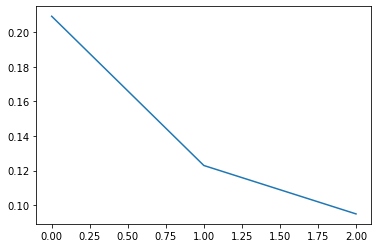

In [4]:
#n_components = min(n_muestras, n_features)
pca = PCA(n_components=3)
pca.fit(X_train)

ipca = IncrementalPCA(n_components=3, batch_size=10)
ipca.fit(X_train)

plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_)
plt.show()

In [5]:
kpca = KernelPCA(n_components=4, kernel='poly' )
kpca.fit(X_train)

KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
          fit_inverse_transform=False, gamma=None, kernel='poly',
          kernel_params=None, max_iter=None, n_components=4, n_jobs=None,
          random_state=None, remove_zero_eig=False, tol=0)

In [6]:
logistic = LogisticRegression(solver='lbfgs')

In [7]:
dt_train = pca.transform(X_train)
dt_test = pca.transform(X_test)
logistic.fit(dt_train,y_train)
print("SCORE PCA: ", logistic.score(dt_test, y_test))

SCORE PCA:  0.7857142857142857


In [8]:
dt_train = ipca.transform(X_train)
dt_test = ipca.transform(X_test)
logistic.fit(dt_train, y_train)
print("SCORE IPCA: ", logistic.score(dt_test, y_test))

SCORE IPCA:  0.8051948051948052


In [9]:
dt_train = kpca.transform(X_train)
dt_test = kpca.transform(X_test)
logistic.fit(dt_train, y_train)
print("SCORE KPCA: ", logistic.score(dt_test, y_test))

SCORE KPCA:  0.7987012987012987
